Project Proposal: 
"""
The data
The HR department has assembled data on almost 10,000 employees who left the company between 2016-2020. They used information from exit interviews, performance reviews, and employee records.

"department" - the department the employee belongs to.

"promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.

"review" - the composite score the employee received in their last evaluation.

"projects" - how many projects the employee is involved in.

"salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.

"tenure" - how many years the employee has been at the company.

"satisfaction" - a measure of employee satisfaction from surveys.

"bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.

"avghrsmonth" - the average hours the employee worked in a month.

"left" - "yes" if the employee ended up leaving, "no" otherwise.

""" -From kaggle: https://www.kaggle.com/datasets/marikastewart/employee-turnover


# Background
   * Job turnover increasing every year:http://www.deltapeo.com/wp-content/uploads/2021/03/Turnover-%E2%80%98Tsunami-Expected-Once-Pandemic-Ends.pdf
    
   *  Numbers skyrocketed post pandemic 
# Research questions (potential)
   * Does salary have effect on turnover rate?  #Salary vs turnover
   * Are certain departments more likely to leave their job? #turnover rate vs department
   * What is the correlation between  hours worked vs satisfaction? hours > avg ; satisfaction < avg = quit?
   * what is the relationship between employee review and likelihood to  leave job?
   * Are people who get bonuses more likely to  stay?
   * Years at company vs salary?
   * Years at company vs promotion?
   * Which is more likely to make people stay: promotion  or  bonus?
    
    
# Analysis
# Conclusion
# Future work

In [2]:
#Load necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [13]:
#Load the  data set  and save as "df"
df = pd.read_csv('employee_churn_data.csv')
df



,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


In [9]:
#Finding how many different departments there are 
jobs = df.groupby('department')
for item in jobs:
    print(item)
    
#Jobs: IT, admin, engineering, finance, marketing, logistics, operations, retail, sales, support 

('IT',      department  promoted    review  projects  salary  tenure  satisfaction  \
5            IT         0  0.683206         2  medium     5.0      0.565252   
16           IT         0  0.679621         4     low     6.0      0.480245   
38           IT         0  0.707113         4  medium     7.0      0.377903   
58           IT         0  0.695908         2  medium     5.0      0.528461   
60           IT         0  0.581580         3  medium     7.0      0.621281   
...         ...       ...       ...       ...     ...     ...           ...   
9448         IT         0  0.621880         4  medium     8.0      0.550496   
9474         IT         0  0.705368         3  medium     8.0      0.426446   
9499         IT         0  0.728516         3  medium     8.0      0.617219   
9526         IT         0  0.618985         3  medium     8.0      0.447210   
9538         IT         0  0.584446         4  medium     8.0      0.607287   

      bonus  avg_hrs_month left  
5         

In [14]:
#Inspecting df dimensions 
df.shape  #9540 people, 10 columns 

(9540, 10)

In [15]:
#Inspecting df values, count == count, no missing data 
df.describe() 

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [52]:
#Total values of people who left or didn't leave 
df['left'].value_counts()

#Column of just people who left as  true 
df['left_yes'] = (df['left'] == 'yes')

#Column of just people who did not leave  as  true 
df['left_no'] = (df['left'] != 'yes')

no     6756
yes    2784
Name: left, dtype: int64

In [49]:
#sum each boolean column, divide people who left by total employees
#Find turnover rate 
turn_rate = (df['left_yes'].sum())/(df['left'].value_counts().sum())
turn_rate

0.2918238993710692

In [40]:
#Separate between numeric and categorical columns 
#Numeric values: review, projects, tenure, satisfaction, avg_hours_month
#Categorical: promoted, bonus, left, left_yes, left_no

df_num = df[['review','projects','tenure','satisfaction','avg_hrs_month']]
df_cat = df[['promoted','bonus','left','left_yes','left_no']]


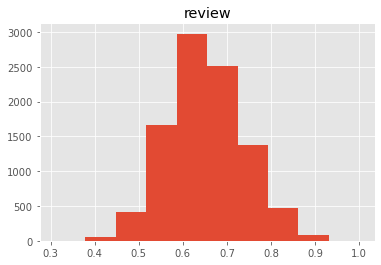

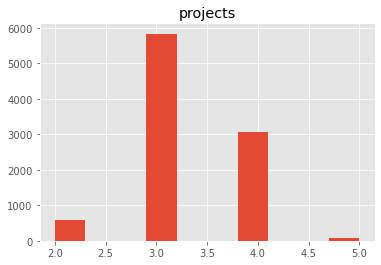

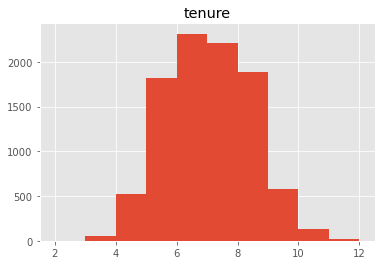

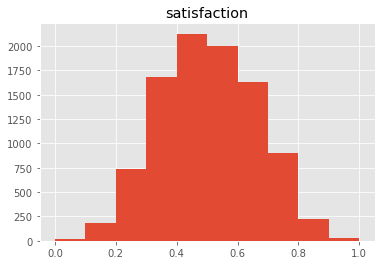

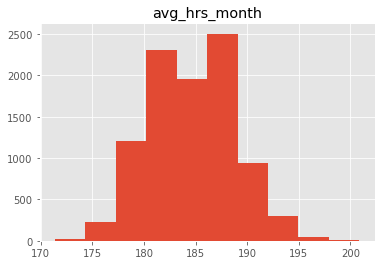

In [42]:
#Quick look at numeric columns distribution, all seem normal 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

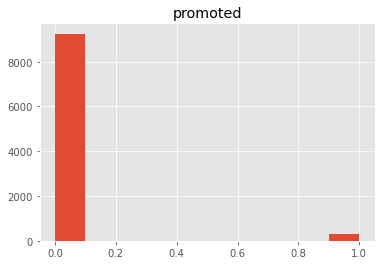

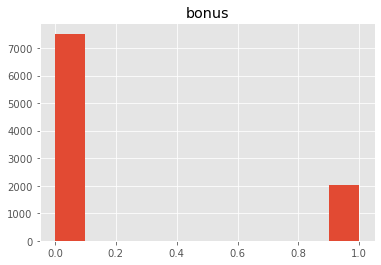

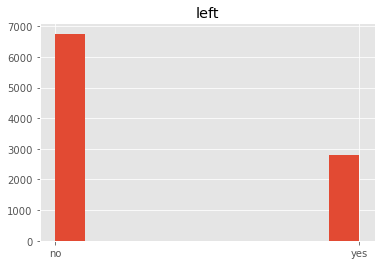

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

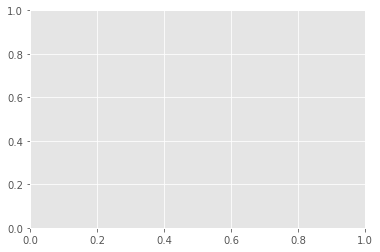

In [46]:
#Quick look aat general ratios in categorical columns of  True vs False 
for i in df_cat.columns:
    plt.hist(df_cat[i])
    plt.title(i)
    plt.show()